# Multi-core bash

## Transform a simple "for loop" in multicore "for loop"
**For Loop**

You may run the full process by applying the loop in the usual way: 

In [ ]:
%%bash 
cd /media/sf_LVM_shared/my_SE_data/exercise
time (
    
for file in geodata/LST/LST_MOYDmax_month?.tif; do
echo $file
filename=$(basename  $file .tif)
gdal_translate -co COMPRESS=DEFLATE -co ZLEVEL=9 -r average -tr 0.0008333333333333 0.0008333333333333 $file geodata/LST/${filename}_10k.tif
done

)

In this way only one processor will be used. The others will be just sleeping or eventually swap when the process is applied to another tif.

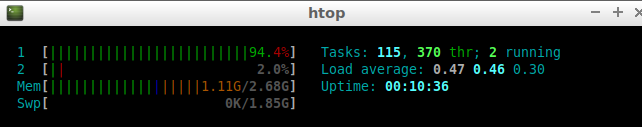

In [9]:
from IPython.display import Image
Image("../images/xargs_core1.png")

**xargs loop**

The xargs command allows to run a process splitting the task to several processors numerically defined by the user: 

In [11]:
%%bash
cd /media/sf_LVM_shared/my_SE_data/exercise
time (

ls geodata/LST/LST_MOYDmax_month?.tif | xargs -n 1 -P 2  bash -c $'
file=$1
filename=$(basename  $file .tif)
gdal_translate -co COMPRESS=DEFLATE -co ZLEVEL=9  -r average -tr 0.0008333333333333  0.0008333333333333 $file  geodata/LST/${filename}_10k.tif
' _ 

)

Input file size is 1080, 840
0Input file size is 1080, 840
0......1010......20.20...30...30.....4040......5050......6060......70.70.....8080......9090......100 - done.
100 - done.
Input file size is 1080, 840
0Input file size is 1080, 840
0.....10..10.....20.20....30..30.....4040......5050......6060......7070.....80.80......9090......100 - done.
100 - done.
Input file size is 1080, 840
0.Input file size is 1080, 840
0....10...10...20...20..30..30......4040......5050......6060......70.70....80.80......9090......100 - done.
Input file size is 1080, 840
0...10100 - done.
..Input file size is 1080, 840
0..20....10.30......20...3040....40....50..50....60...60...70..70....80..80....90..90.....100 - done.
Input file size is 1080, 840
0...10.100 - done.
..20...30...40...50...60...70...80...90...100 - done.



real	0m24.321s
user	0m36.641s
sys	0m3.390s


- The -n option identifies the argument. The argument is the variable imported inside the loop.
- The argument is identifies with \\$1 and for a better understanding renamed to file (file=\\$1).
- The -P option identify the processors (in this case 2) used to run the full line inside -c $' ..... ' _

For example, the following picture shows the processing time during the xargs loop. As you can see two processors are running simultaneously, and the whole processing time is shorter. 

In [ ]:
from IPython.display import Image
Image("../images/xargs_core2.png")